In [84]:
import time, os
import numpy as np
import pandas as pd
from model import LSTM_model
from get_dataset import IMU_dataset
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [85]:
created_time = int(time.time())

epochs = 50
frame_len = 30
batch_size = 128
learning_rate = 0.0001
loss = 'categorical_crossentropy'

In [86]:
dataset_dir = 'dataset'
data = IMU_dataset(dataset_dir)
pose_list = os.listdir('./dataset')
x_data, y_data = data.Sequence_data(frame_len)
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
y_data = to_categorical(y_data, len(pose_list))
print(np.shape(x_data), np.shape(y_data))

(1374, 30, 3) (1374, 2)


In [87]:
num_degree = np.shape(x_data)[-1]
num_pose = len(os.listdir('./dataset'))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 30, 64)            17408     
                                                                 
 lstm_22 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_23 (LSTM)              (None, 128)               131584    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 257,138
Trainable params: 257,138
Non-tr

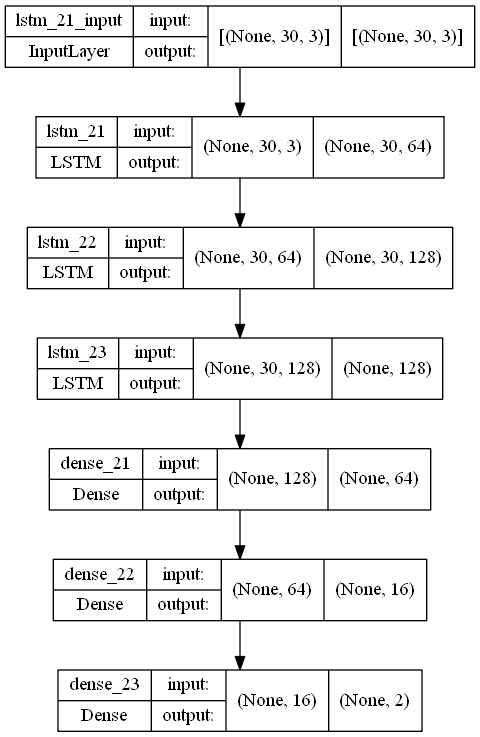

In [88]:
model = LSTM_model(num_degree, num_pose)
model.summary()
plot_model(model, show_shapes=True)

In [89]:
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=loss,
    metrics=['acc'])

In [90]:
cb = EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, mode='min',
    baseline=None, restore_best_weights=True
)

In [91]:
x_train, x_val, y_train, y_val, = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

In [92]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    callbacks=[cb]
)

Epoch 1/50
9/9 [==============================] - 7s 335ms/step - loss: 0.6933 - acc: 0.4795 - val_loss: 0.6934 - val_acc: 0.4473
Epoch 2/50
9/9 [==============================] - 2s 229ms/step - loss: 0.6931 - acc: 0.5132 - val_loss: 0.6935 - val_acc: 0.4218
Epoch 3/50
9/9 [==============================] - 2s 226ms/step - loss: 0.6931 - acc: 0.5068 - val_loss: 0.6937 - val_acc: 0.4327
Epoch 4/50
9/9 [==============================] - 2s 245ms/step - loss: 0.6931 - acc: 0.4995 - val_loss: 0.6940 - val_acc: 0.4764
Epoch 5/50
9/9 [==============================] - 2s 248ms/step - loss: 0.6930 - acc: 0.5096 - val_loss: 0.6941 - val_acc: 0.4655
Epoch 6/50
9/9 [==============================] - 2s 240ms/step - loss: 0.6930 - acc: 0.5050 - val_loss: 0.6943 - val_acc: 0.4400
Epoch 6: early stopping


In [93]:
model.save(f'models/{loss}_{created_time}/model_.h5')

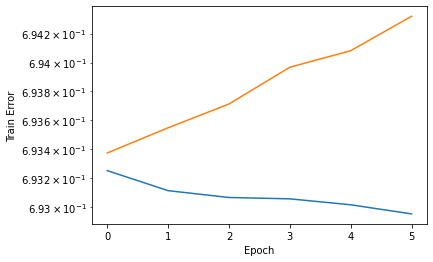

In [96]:
plt.figure()
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.savefig(f"models/{loss}_{created_time}/train_error.png")
plt.show()